In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\along\AppData\Local\Temp\ipykernel_80\2099696251.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [9]:
df = pd.read_csv('eurusd.csv', parse_dates= ['Date'], index_col='Date')
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8+ KB


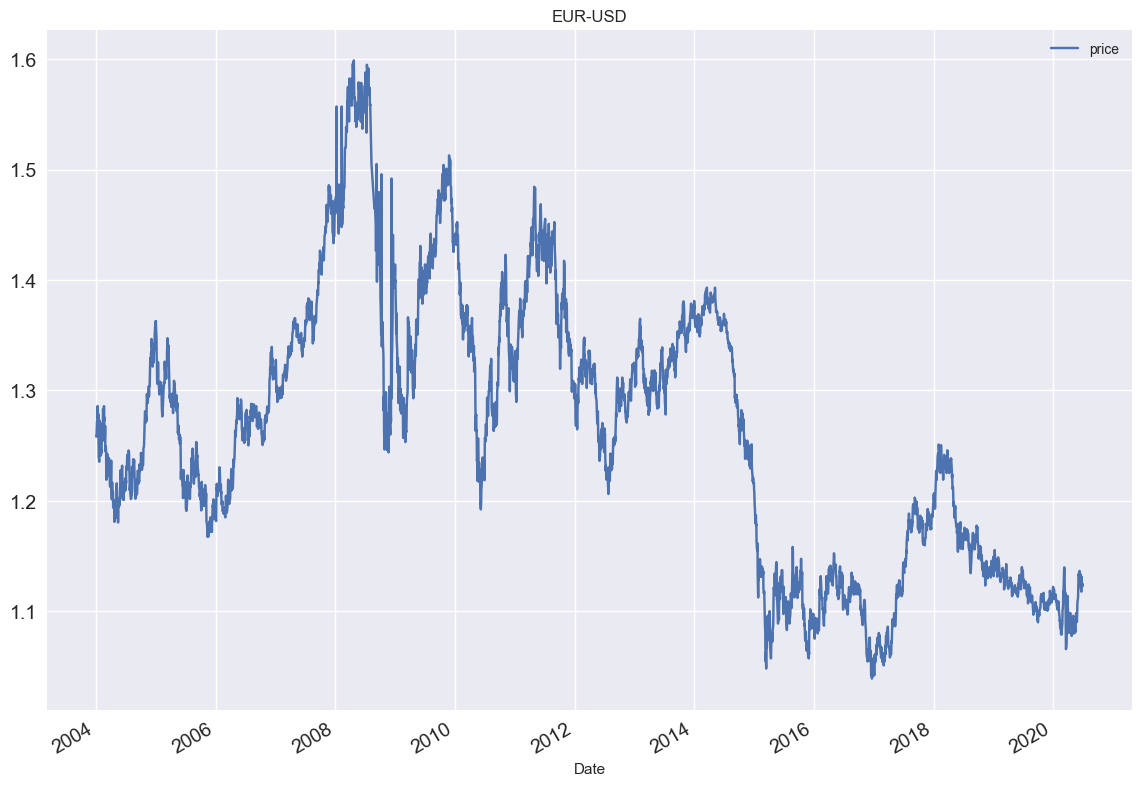

In [27]:
df.plot(figsize= (14, 10), title= 'EUR-USD', fontsize= 14)
plt.show()

In [28]:
#Daily price movement in favour of EUR (positive)
df['returns'] = np.log(df.div(df.shift(1)))
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


A Simple Buy and Hold Strategy

In [29]:
df.dropna(inplace=True)
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


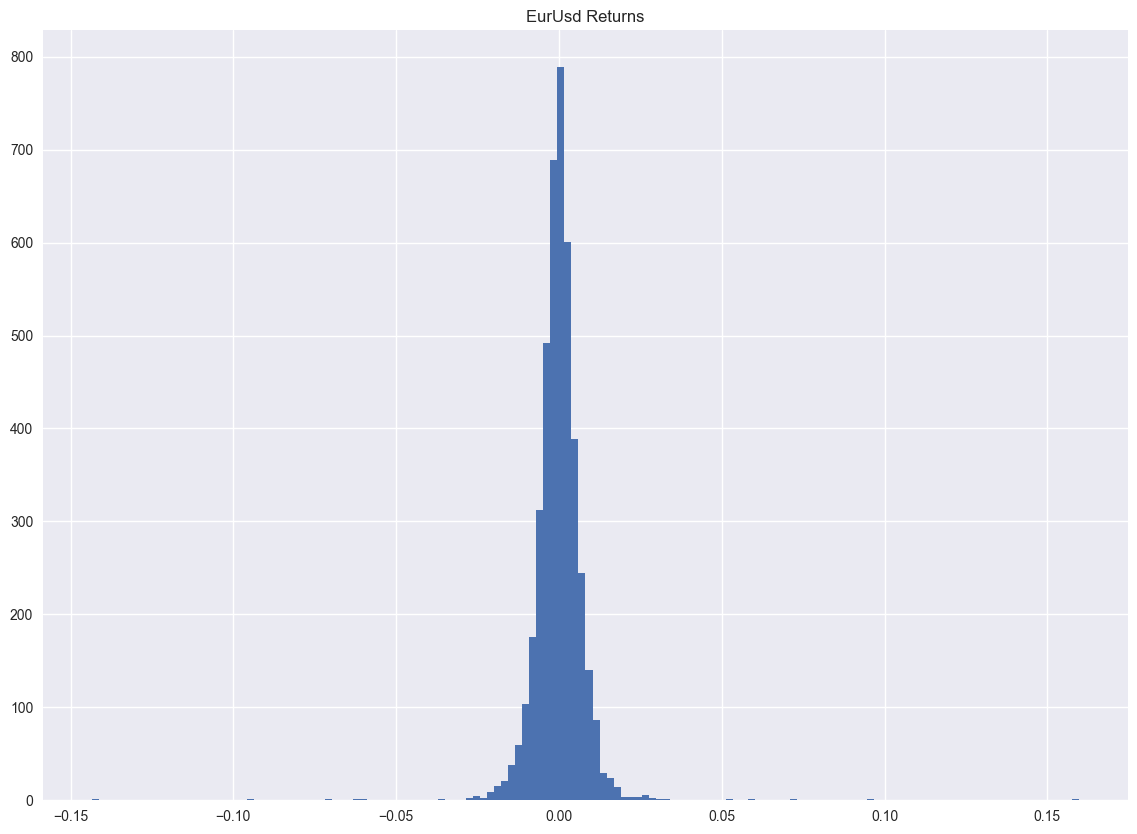

In [34]:
df.returns.hist(bins=140, figsize=(14, 10))
plt.title("EurUsd Returns")
plt.show()

In [35]:
df.returns.sum()

-0.11214302770699758

In [37]:
# 1 dollar invest 
np.exp(df.returns.sum())
# or first price divide by last price
#df.price[-1] / df.price[0]

0.8939163935445148

In [40]:
#dollar returns
df['cumsum_returns'] = df.returns.cumsum().apply(np.exp)

In [41]:
df

,price,returns,cumsum_returns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


<AxesSubplot: title={'center': 'EUR-USD -Buy Hold'}, xlabel='Date'>

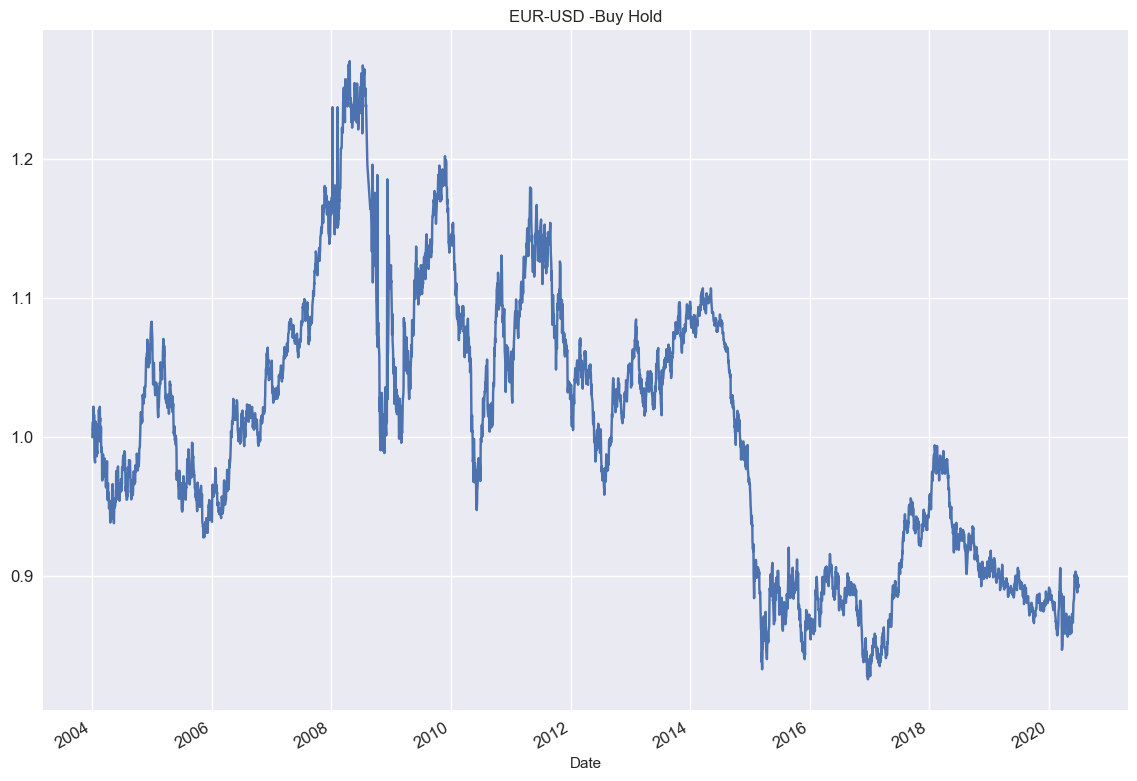

In [42]:
df.cumsum_returns.plot(figsize=(14, 10), title='EUR-USD -Buy Hold', fontsize=12)